In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sim1 = pd.read_csv('/home/ryuga/newData/simout_1.csv')
sim1.head()

,tout,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
0,0.01,0.27103,3649.7,4451.3,9.2231,32.393,47.560,2799.0,64.996,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
1,0.02,0.27185,3689.3,4444.5,9.2526,32.181,47.771,2799.1,64.358,122.89,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
2,0.03,0.27124,3645.2,4444.6,9.2110,32.627,47.649,2799.0,63.644,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
3,0.04,0.27062,3653.2,4459.6,9.3142,32.493,47.579,2798.6,64.830,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
4,0.05,0.27134,3668.2,4486.7,9.2479,32.295,47.595,2799.2,64.585,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986


In [3]:
def sig_corr(x1, x2, wlag, t_amostragem):
    correlations = np.zeros(wlag)
    for i in np.arange(0, wlag):
        correlations[i] = (1/(len(x1) - i))*np.dot(x1[i:],x2[:(len(x2) - i)])
    return np.array([(np.argmax(correlations))*t_amostragem, np.max(correlations)])

In [59]:
def normalize_dfs(dfs):
    all_dfs = pd.concat(dfs)
    norm_dfs = []
   
    all_dfs_norm =  (all_dfs - all_dfs.mean())/all_dfs.std()
    all_dfs_norm['tout'] = all_dfs['tout']
    
    num_linhas = int(len(all_dfs)/len(dfs))
    num_blocks = int(len(all_dfs)/len(dfs[0]))
    
    for i in np.arange(0, num_blocks):
        df = all_dfs_norm.iloc[(i*num_linhas) : (i*num_linhas + num_linhas),:]
        norm_dfs.append(df)
    return norm_dfs
        

In [94]:
def get_dfs(init, end):
    dfs = []
    for i in np.arange(init,end):
        dfs.append(pd.read_csv('/home/ryuga/newData/simout_' + str(i) + '.csv'))
    return dfs

In [96]:
#reading dfs
dfs_fail_0  = get_dfs(291,301)
dfs_fail_25 = get_dfs(301, 311)
dfs_fail_50 = get_dfs(311,321)
dfs_fail_75 = get_dfs(321,331)
dfs_fail_100 = get_dfs(331,341)

In [76]:
def mean_correlation(wlag, dfs = []):
    matrix_corr_list = []
    m_sum = np.zeros([dfs[0].shape[1] -1 , dfs[0].shape[1] -1])
    dfs_norm = normalize_dfs(dfs)
 
    for df in dfs_norm:
        tam_m = int(len(df.columns[1:]))
        m_corr = np.zeros((tam_m,tam_m,2))
        for i, x in enumerate(df.columns[1:]):
            for j, y in enumerate(df.columns[1:]):
                m_corr[i][j] = sig_corr(np.array(df[x]), np.array(df[y]),wlag, 0.01)
            matrix_corr_list.append(m_corr)
        
    for m in matrix_corr_list:
        m_sum = np.add(m_sum, m[:,:,1])
    m_sum = m_sum/len(dfs)
    
    return m_sum/np.diagonal(m_sum)

In [98]:
mean_matrix_0 = mean_correlation(int(2/0.01), dfs_fail_0)
mean_matrix_25 = mean_correlation(int(2/0.01), dfs_fail_25)
mean_matrix_50 = mean_correlation(int(2/0.01), dfs_fail_50)
mean_matrix_75 = mean_correlation(int(2/0.01), dfs_fail_75)
mean_matrix_100 = mean_correlation(int(2/0.01), dfs_fail_100)

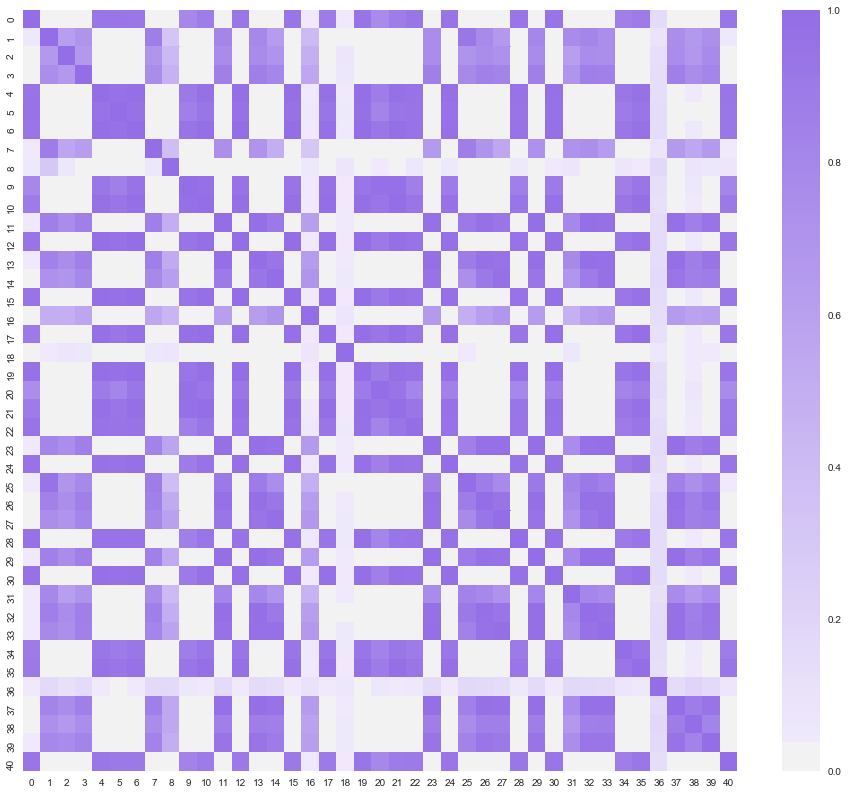

In [106]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(16, 14))
cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)

sns.heatmap(mean_matrix_50, cmap=cmap, vmax=1, vmin=0, center=0)
plt.show()